In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import collections

In [2]:
# Фильмы с известным рейтингом на IMDb
df1 = pd.read_csv('ratings.tsv', sep='\t')
df1.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1647
1,tt0000002,6.1,198
2,tt0000003,6.5,1345
3,tt0000004,6.2,120
4,tt0000005,6.2,2131


In [3]:
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072239 entries, 0 to 1072238
Data columns (total 3 columns):
tconst           1072239 non-null object
averageRating    1072239 non-null float64
numVotes         1072239 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.5+ MB


tconst           0
averageRating    0
numVotes         0
dtype: int64

In [4]:
# Все фильмы на IMDb
df2 = pd.read_csv('basics.tsv', sep='\t')
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7162142 entries, 0 to 7162141
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: int64(1), object(8)
memory usage: 491.8+ MB


tconst            0
titleType         0
primaryTitle      9
originalTitle     9
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            9
dtype: int64

In [6]:
# Соединим датасеты
df3 = pd.merge(df1, df2, on='tconst', how='outer')
df3.shape

(7162149, 11)

In [7]:
# Этот столбец больше не понадобится
del df3['tconst']

In [8]:
df3.isnull().sum()

averageRating     6089910
numVotes          6089910
titleType               7
primaryTitle           16
originalTitle          16
isAdult                 7
startYear               7
endYear                 7
runtimeMinutes          7
genres                 16
dtype: int64

In [9]:
# Оставим только фильмы с известным рейтингом, 
df3.dropna(subset=['averageRating'], inplace=True)
df3.isnull().sum()

averageRating     0
numVotes          0
titleType         7
primaryTitle      8
originalTitle     8
isAdult           7
startYear         7
endYear           7
runtimeMinutes    7
genres            9
dtype: int64

In [10]:
# Оставим только фильмы с известными названиями
df3.dropna(subset=['primaryTitle'], inplace=True)
df3.isnull().sum()

averageRating     0
numVotes          0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            2
dtype: int64

In [11]:
# Удалим фильмы, у которых не указаны жанры
df3.dropna(subset=['genres'], inplace=True)
df3.isnull().sum()

averageRating     0
numVotes          0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [12]:
df3.head()

,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,5.6,1647.0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,6.1,198.0,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,6.5,1345.0,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,6.2,120.0,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,6.2,2131.0,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [13]:
# Датасет Нетфликса
dfn = pd.read_csv('netflix_titles.csv')
dfn.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [14]:
# Проверим названия столбцов на корректность
dfn.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [16]:
dfn.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [17]:
# Удалим фильмы без рейтинга, поскольку нас интересует именно он
dfn.dropna(subset=['rating'], inplace=True)
dfn.isnull().sum()

show_id            0
type               0
title              0
director        1965
cast             567
country          472
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
# Заполним пропущенные значения
for name in ['director', 'cast', 'country', 'date_added']:
    dfn[name] = dfn[name].fillna('unknown')
dfn.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
# Преобразуем данные, чтобы максимизировать число совпадений при соединении датасетов
dfn['title'] = dfn['title'].str.lower()
df3['originalTitle'] = df3['originalTitle'].str.lower()
df3['primaryTitle'] = df3['primaryTitle'].str.lower()
dfn['release_year'] = dfn['release_year'].astype(np.int64)
df3 = df3[df3['startYear'].apply(lambda x: str(x).isnumeric())]
df3['startYear'] = df3['startYear'].astype(np.int64)

In [20]:
# Склеиваем с Нетфликсом
df = pd.merge(dfn, df3, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4890
Data columns (total 22 columns):
show_id           4891 non-null int64
type              4891 non-null object
title             4891 non-null object
director          4891 non-null object
cast              4891 non-null object
country           4891 non-null object
date_added        4891 non-null object
release_year      4891 non-null int64
rating            4891 non-null object
duration          4891 non-null object
listed_in         4891 non-null object
description       4891 non-null object
averageRating     4891 non-null float64
numVotes          4891 non-null float64
titleType         4891 non-null object
primaryTitle      4891 non-null object
originalTitle     4891 non-null object
isAdult           4891 non-null float64
startYear         4891 non-null int64
endYear           4891 non-null object
runtimeMinutes    4891 non-null object
genres            4891 non-null object
dtypes: float64(3), int64(3), objec

In [21]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
averageRating     0
numVotes          0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [22]:
# Есть ли дубликаты
df.duplicated().sum()

0

In [23]:
# df = df.drop_duplicates().reset_index(drop=True)
df.shape

(4891, 22)

In [24]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4889,70196145,TV Show,new girl,unknown,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,...,7.8,46.0,tvEpisode,new girl,new girl,0.0,2017,\N,27,"Family,Fantasy"
4890,70153404,TV Show,friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,unknown,2003,TV-14,10 Seasons,...,6.3,6.0,tvEpisode,friends,tomogaki,0.0,2003,\N,23,"Animation,Comedy,Romance"


In [25]:
# Обратим внимание на сериал "Друзья": слишком низкий рейтинг, да и число проголосовавших не может быть столь малым для хита
df[(df['title'] == 'friends')]
# Этот столбец больше не понадобится
# del df3['tconst']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4890,70153404,TV Show,friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,unknown,2003,TV-14,10 Seasons,...,6.3,6.0,tvEpisode,friends,tomogaki,0.0,2003,\N,23,"Animation,Comedy,Romance"


In [26]:
# Что известно о нём на Нетфликсе
dfn[(dfn['title'] == 'friends')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6233,70153404,TV Show,friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,unknown,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [27]:
# Какие есть одноимённые фильмы на IMDb
df3[(df3['primaryTitle'] == 'friends')]

,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1037,5.6,226.0,short,friends,friends,0.0,1912,\N,17,"Romance,Short,Western"
13268,6.4,18.0,movie,friends,druzya,0.0,1939,\N,100,"Biography,War"
44176,6.6,834.0,movie,friends,friends,0.0,1971,\N,101,"Drama,Romance"
54046,7.2,44.0,tvSeries,friends,friends,0.0,1979,1979,60,"Comedy,Drama"
68176,5.9,55.0,movie,friends,friends,0.0,1988,\N,87,"Comedy,Drama"
78064,5.9,95.0,movie,friends,friends,0.0,1993,\N,105,Drama
79521,8.9,784731.0,tvSeries,friends,friends,0.0,1994,2004,22,"Comedy,Romance"
152985,7.5,780.0,movie,friends,friends,0.0,1999,\N,150,"Comedy,Drama"
178859,7.5,1995.0,movie,friends,friends,0.0,2001,\N,167,"Comedy,Drama,Romance"
182332,7.8,177.0,tvSeries,friends,friends,0.0,2002,\N,\N,Romance


In [28]:
# Очевидно, искомый тот, который транслировался с 1994 по 2004 годы
df3[(df3['primaryTitle'] == 'friends') & (df3['endYear'] == '2004')]

,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
79521,8.9,784731.0,tvSeries,friends,friends,0.0,1994,2004,22,"Comedy,Romance"


In [29]:
df[(df['title'] == 'friends')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4890,70153404,TV Show,friends,unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,unknown,2003,TV-14,10 Seasons,...,6.3,6.0,tvEpisode,friends,tomogaki,0.0,2003,\N,23,"Animation,Comedy,Romance"


In [30]:
df.loc[4890]

show_id                                                    70153404
type                                                        TV Show
title                                                       friends
director                                                    unknown
cast              Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
country                                               United States
date_added                                                  unknown
release_year                                                   2003
rating                                                        TV-14
duration                                                 10 Seasons
listed_in                            Classic & Cult TV, TV Comedies
description       This hit sitcom follows the merry misadventure...
averageRating                                                   6.3
numVotes                                                          6
titleType                                       

In [31]:
# Заменим информацию о сериале "Друзья" в итоговой таблице
df.loc[4890, 'release_year'] = df3.loc[79521, 'startYear']
for name in ['averageRating', 'numVotes', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']:
    df.loc[4890, name] = df3.loc[79521, name]
df.loc[4890]

show_id                                                    70153404
type                                                        TV Show
title                                                       friends
director                                                    unknown
cast              Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
country                                               United States
date_added                                                  unknown
release_year                                                   1994
rating                                                        TV-14
duration                                                 10 Seasons
listed_in                            Classic & Cult TV, TV Comedies
description       This hit sitcom follows the merry misadventure...
averageRating                                                   8.9
numVotes                                                     784731
titleType                                       

In [32]:
# Теперь эти столбцы не понадобятся
del df['release_year']
del df['primaryTitle']
del df['originalTitle']

In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description', 'averageRating',
       'numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres'],
      dtype='object')

In [34]:
# Типы фильмов на Нетфликсе
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [35]:
# Типы фильмов на IMDb
df['titleType'].unique()

array(['movie', 'tvSpecial', 'tvMiniSeries', 'tvEpisode', 'short',
       'tvSeries', 'tvShort', 'video', 'tvMovie', 'videoGame'],
      dtype=object)

In [36]:
df['titleType'].value_counts()

movie           2924
tvSeries         795
tvEpisode        439
tvSpecial        207
short            169
tvMiniSeries     128
tvMovie          114
video             62
videoGame         40
tvShort           13
Name: titleType, dtype: int64

(-1.1128372007096876,
 1.1006112952718898,
 -1.1100893082002679,
 1.113329610425715)

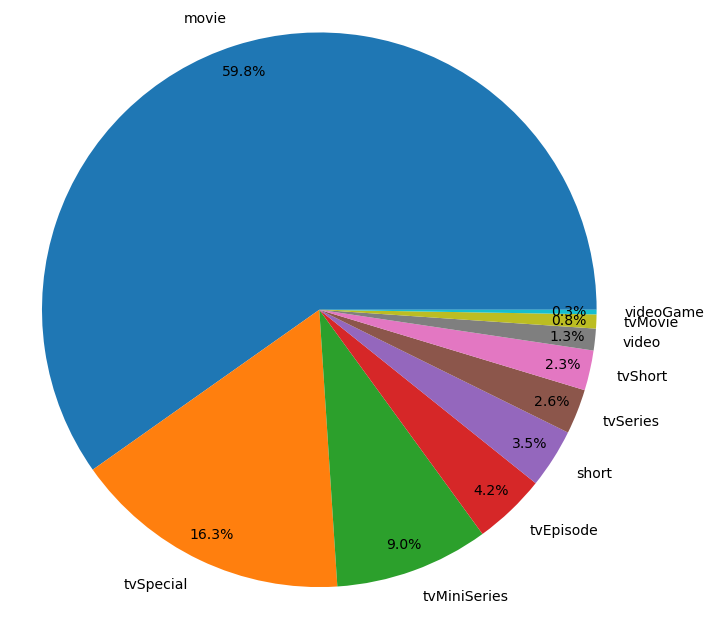

In [37]:
fig, ax = plt.subplots(figsize=(11, 11))
ax.pie(df['titleType'].value_counts(),
       labels=df['titleType'].unique(),
       autopct='%1.1f%%',
       pctdistance=0.9,
       textprops={'fontsize': 14})
ax.axis('equal')

Text(0, 0.5, 'Частота')

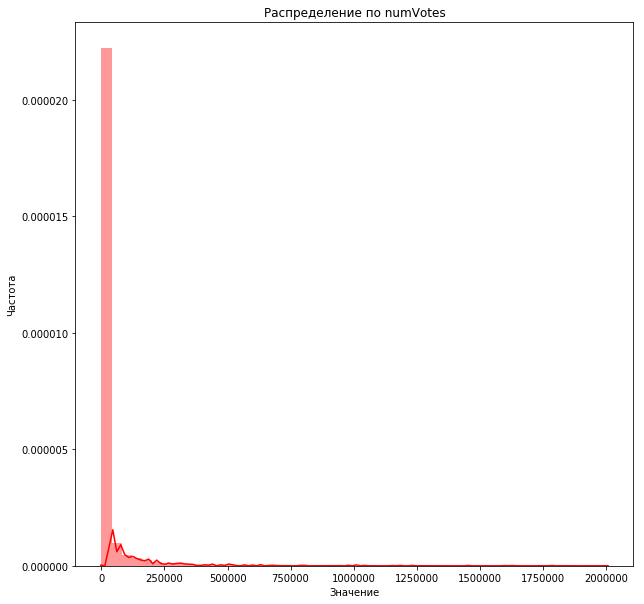

In [38]:
plt.figure(figsize=(10, 10))
sns.distplot(pd.to_numeric(df['numVotes'], errors='ignore'), color='red')
plt.title('Распределение по numVotes')
plt.xlabel('Значение')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

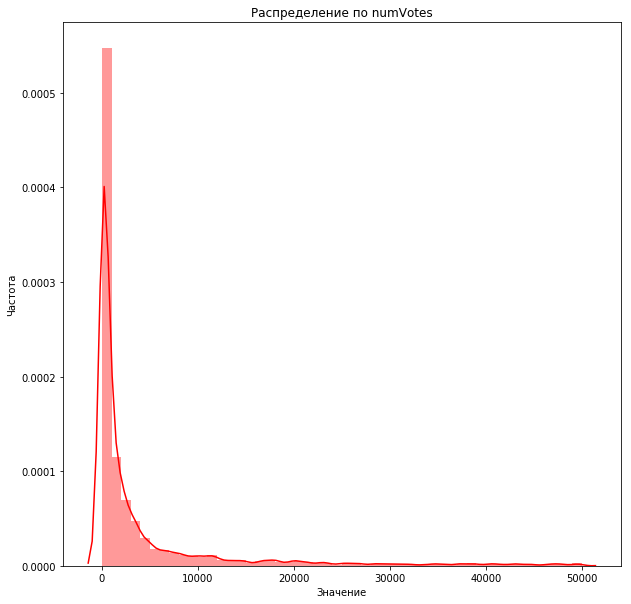

In [39]:
# Из гистограммы видно, что у большинства фильмов менее 250000 оценок, чаще - менее 50000
# Посмотрим поближе
plt.figure(figsize=(10, 10))
sns.distplot(pd.to_numeric(df[df['numVotes'] <= 50000]['numVotes'], errors='ignore'), color='red')
plt.title('Распределение по numVotes')
plt.xlabel('Значение')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

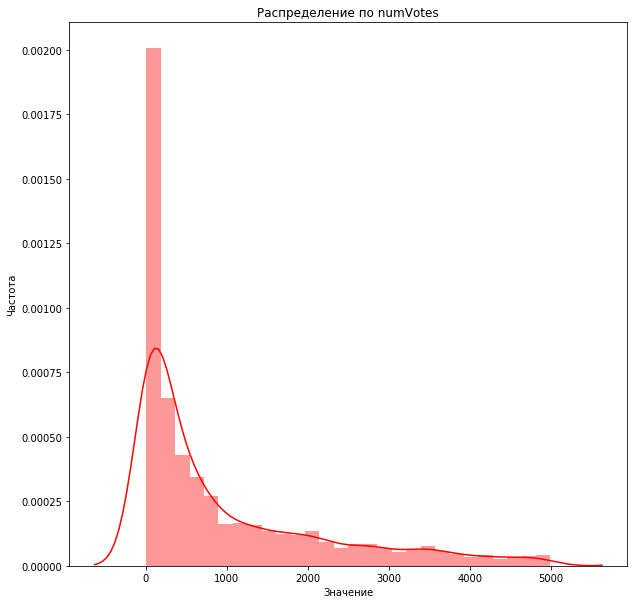

In [40]:
# У многих фильмов менее 5000 оценок, посмотрим ещё ближе
plt.figure(figsize=(10, 10))
sns.distplot(pd.to_numeric(df[df['numVotes'] <= 5000]['numVotes'], errors='ignore'), color='red')
plt.title('Распределение по numVotes')
plt.xlabel('Значение')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

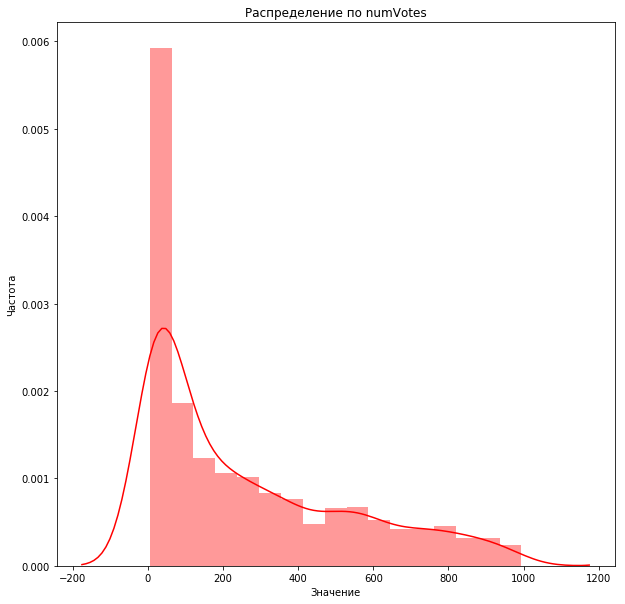

In [41]:
# У половины фильмов менее 1000 оценок
plt.figure(figsize=(10, 10))
sns.distplot(pd.to_numeric(df[df['numVotes'] <= 1000]['numVotes'], errors='ignore'), color='red')
plt.title('Распределение по numVotes')
plt.xlabel('Значение')
plt.ylabel('Частота')

In [42]:
df[df['numVotes'] <= 1000]['numVotes'].count()

2420

Text(0, 0.5, 'Частота')

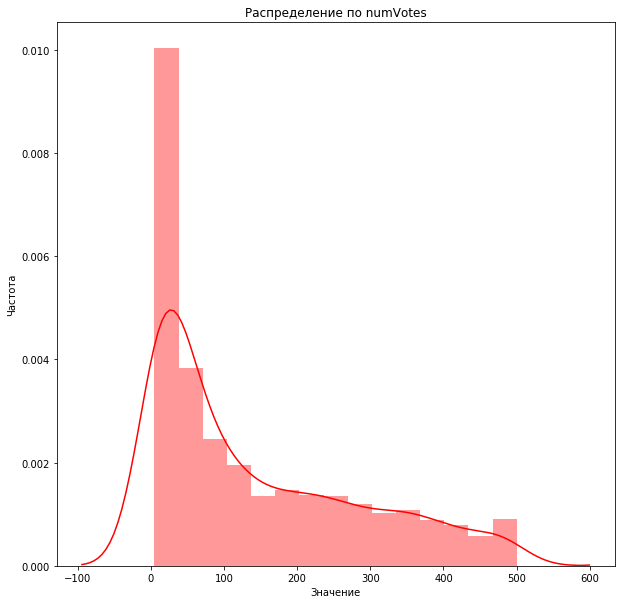

In [43]:
plt.figure(figsize=(10, 10))
sns.distplot(pd.to_numeric(df[df['numVotes'] <= 500]['numVotes'], errors='ignore'), color='red')
plt.title('Распределение по numVotes')
plt.xlabel('Значение')
plt.ylabel('Частота')

In [44]:
# Оставим фильмы, у которых есть хотя бы 500 оценок
df = df[df['numVotes'] >= 500]
df.shape

(2984, 19)

In [45]:
# Фильм с самым низким рейтингом
df[df['averageRating'] == df['averageRating'].min()]

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres
3134,70169918,Movie,justin bieber: never say never,Jon M. Chu,"Justin Bieber, Ludacris, Usher Raymond, Jaden ...",United States,"January 1, 2018",G,106 min,"Documentaries, Music & Musicals",Teen idol Justin Bieber provides personal snap...,1.6,75072.0,movie,0.0,2011,\N,105,"Documentary,Music"


In [46]:
# Фильм с самым высоким рейтингом
df[df['averageRating'] == df['averageRating'].max()]

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres
3751,80195377,TV Show,planet earth ii,unknown,David Attenborough,United Kingdom,"December 25, 2017",TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV","In this sequel to the Emmy-winning ""Planet Ear...",9.5,91515.0,tvMiniSeries,0.0,2016,2016,298,Documentary


(-1.1155408809097098,
 1.1007400419480815,
 -1.1118143353944319,
 1.117857696788233)

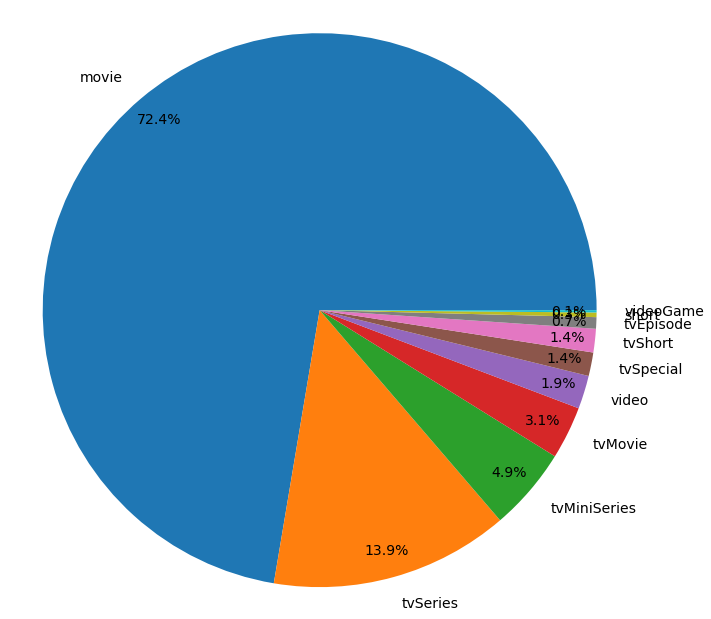

In [60]:
fig, ax = plt.subplots(figsize=(11, 11))
ax.pie(df['titleType'].value_counts(),
       labels=df['titleType'].unique(),
       autopct='%1.1f%%',
       pctdistance=0.9,
       textprops={'fontsize': 14})
ax.axis('equal')

Text(0, 0.5, 'Частота')

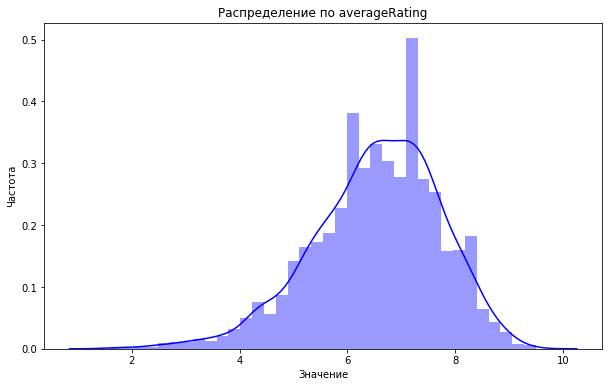

In [48]:
# Исчезли некоторые непопулярные сериалы
# Посмотрим на распределение по оценкам
plt.figure(figsize=(10, 6))
sns.distplot(pd.to_numeric(df['averageRating'], errors='ignore'), color='blue')
plt.title('Распределение по averageRating')
plt.xlabel('Значение')
plt.ylabel('Частота')

In [49]:
# Распределение колоколообразное, предполагаем, что оно нормальное
# Отсортируем фильмы по рейтингу, чтобы посмотреть на наиболее высоко оценённые
df.sort_values(by=['averageRating', 'numVotes'], inplace=True, ascending=False)
df[['title', 'director', 'country', 'startYear', 'averageRating', 'numVotes', 'genres']].head(20)

,title,director,country,startYear,averageRating,numVotes,genres
3751,planet earth ii,unknown,United Kingdom,2016,9.5,91515.0,Documentary
3674,blue planet ii,unknown,United Kingdom,2017,9.3,30831.0,Documentary
4436,our planet,unknown,"United States, United Kingdom",2019,9.3,28406.0,Documentary
1546,the hunt,unknown,United Kingdom,2015,9.3,3602.0,Documentary
4103,yeh meri family,unknown,India,2018,9.2,18515.0,"Comedy,Drama,Family"
4527,life,unknown,"United Kingdom, United States, Greece, Italy, ...",2009,9.1,37191.0,Documentary
2307,lens,Jayaprakash Radhakrishnan,India,2015,9.1,3520.0,"Drama,Fantasy,Mystery"
2003,hans zimmer: live in prague,Tim Van Someren,United Kingdom,2017,9.1,2257.0,"Documentary,Music"
2186,life story,unknown,United Kingdom,2014,9.1,1916.0,Documentary
620,death note,unknown,Japan,2006,9.0,218526.0,"Animation,Crime,Drama"


Text(0, 0.5, 'Частота')

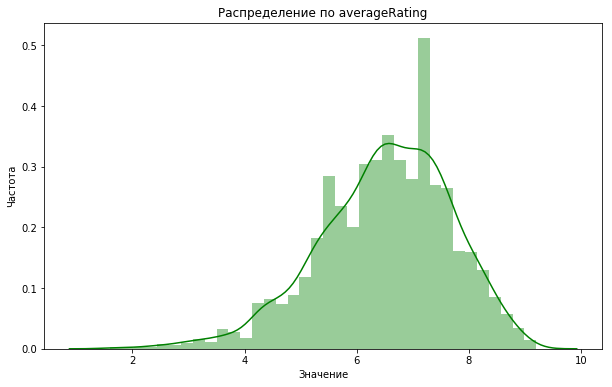

In [50]:
# Видно, что наиболее высокие оценки получили документальные фильмы, поскольку их трудно испортить:
# чаще всего в них освещаются исторические факты, зритель в любом случае узнает что-то новое или систематизирует
# уже имеющуюся у него информацию.
# Посмотрим, что происходит в остальных жанрах
plt.figure(figsize=(10, 6))
sns.distplot(pd.to_numeric(df[df['genres'] != 'Documentary']['averageRating'], errors='ignore'), color='green')
plt.title('Распределение по averageRating')
plt.xlabel('Значение')
plt.ylabel('Частота')

In [51]:
# Распределение тоже похоже на нормальное. Посмотрим на наиболее высоко оценённые фильмы
df[df['genres'] != 'Documentary'][['title', 'director', 'country', 'startYear', 'averageRating', 'numVotes', 'genres']].head(20)

,title,director,country,startYear,averageRating,numVotes,genres
4103,yeh meri family,unknown,India,2018,9.2,18515.0,"Comedy,Drama,Family"
2307,lens,Jayaprakash Radhakrishnan,India,2015,9.1,3520.0,"Drama,Fantasy,Mystery"
2003,hans zimmer: live in prague,Tim Van Someren,United Kingdom,2017,9.1,2257.0,"Documentary,Music"
620,death note,unknown,Japan,2006,9.0,218526.0,"Animation,Crime,Drama"
672,college romance,unknown,India,2018,9.0,20182.0,"Comedy,Drama,Romance"
3925,humsafar,unknown,Pakistan,2011,9.0,3309.0,"Drama,Romance"
3930,zindagi gulzar hai,unknown,Pakistan,2012,9.0,2823.0,Romance
3013,reply 1988,unknown,unknown,2015,9.0,2487.0,"Comedy,Drama,Family"
2782,innocent,Seren Yüce,Turkey,2017,9.0,684.0,Comedy
3109,pulp fiction,Quentin Tarantino,United States,1994,8.9,1782352.0,"Crime,Drama"


In [52]:
# Люди любят драму, хотя на самом деле она присутствует практически везде.
# Также зрителям интересны приключения, экшен и комедии.
# Посмотрим на самые популярные фильмы в целом
df.sort_values(by=['numVotes', 'averageRating'], inplace=True, ascending=False)
df[['title', 'director', 'country', 'startYear', 'averageRating', 'numVotes', 'genres']].head(20)

,title,director,country,startYear,averageRating,numVotes,genres
2982,inception,Christopher Nolan,"United States, United Kingdom",2010,8.8,2006939.0,"Action,Adventure,Sci-Fi"
3109,pulp fiction,Quentin Tarantino,United States,1994,8.9,1782352.0,"Crime,Drama"
1255,the matrix,"Lilly Wachowski, Lana Wachowski",United States,1999,8.7,1634375.0,"Action,Sci-Fi"
3051,the lord of the rings: the return of the king,Peter Jackson,"New Zealand, United States",2003,8.9,1605940.0,"Action,Adventure,Drama"
3054,the lord of the rings: the two towers,Peter Jackson,"New Zealand, United States",2002,8.7,1451316.0,"Action,Adventure,Drama"
2428,inglourious basterds,Quentin Tarantino,"Germany, United States",2009,8.3,1231605.0,"Adventure,Drama,War"
4711,schindler's list,Steven Spielberg,United States,1993,8.9,1184746.0,"Biography,Drama,History"
3996,the departed,Martin Scorsese,United States,2006,8.5,1161114.0,"Crime,Drama,Thriller"
2934,american beauty,Sam Mendes,United States,1999,8.3,1050054.0,Drama
1182,american history x,Tony Kaye,United States,1998,8.5,1015108.0,Drama


In [53]:
# Экшен, приключения, драма, криминал, Тарантино, Скорсезе и Спилберг - ничего удивительного, всё по делу.
# Посмотрим на распределение по странам (проверим, насколько доминируют США)
df['country'].value_counts()

United States                                          1230
India                                                   337
United Kingdom                                          142
unknown                                                  85
South Korea                                              62
                                                       ... 
United Kingdom, Canada                                    1
United States, Italy, United Kingdom, Liechtenstein       1
Germany, United Kingdom, United States                    1
United States, India, Bangladesh                          1
United Kingdom, India, United States                      1
Name: country, Length: 373, dtype: int64

In [54]:
# Почти половина фильмов снято только в США. Посмотрим на наиболее редко встречающиеся страны
lst_countries = list(df['country'].unique())
lst_countries_num = list(df['country'].value_counts())
print(lst_countries[-10:])
lst_unique = list(set(lst_countries_num))
list_counts = []
for i in lst_unique:
    list_counts.append([i, lst_countries_num.count(i)])
list_counts

['Paraguay, Argentina', 'China, Germany, India, United States', 'Belgium, Ireland, Netherlands, Germany, Afghanistan', 'Indonesia, South Korea, Singapore', 'Ghana, United States', 'Germany, Jordan, Netherlands', 'Germany, France, Russia', 'Australia, India', 'United States, Israel, Italy, South Africa', 'Poland, West Germany']


[[1, 265],
 [2, 38],
 [3, 16],
 [4, 10],
 [5, 8],
 [6, 2],
 [7, 2],
 [8, 3],
 [10, 2],
 [11, 1],
 [13, 3],
 [142, 1],
 [17, 3],
 [19, 2],
 [20, 1],
 [21, 1],
 [23, 1],
 [25, 2],
 [26, 1],
 [27, 1],
 [33, 1],
 [38, 1],
 [43, 1],
 [49, 1],
 [60, 2],
 [62, 1],
 [1230, 1],
 [337, 1],
 [85, 1]]

In [55]:
# Получилось очень много фильмов из совсем редко встречающихся стран или снятых в нескольких странах сразу.
# Посмотрим, есть ли некоторые страны СНГ
df['country']
df[(df['country'] == 'Russia') | (df['country'] == 'Ukraine') | (df['country'] == 'Belarus')][['title', 'director', 'country', 'startYear', 'averageRating', 'numVotes', 'genres']]

,title,director,country,startYear,averageRating,numVotes,genres
1147,the method,unknown,Russia,2015,7.4,2018.0,"Crime,Drama,Thriller"
3972,trotsky,unknown,Russia,2017,7.1,1695.0,Biography
2050,servant of the people,unknown,Ukraine,2015,6.8,828.0,Comedy
319,the road to calvary,unknown,Russia,2017,7.7,739.0,Drama


In [61]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres
2982,70131314,Movie,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",8.8,2006939.0,movie,0.0,2010,\N,148,"Action,Adventure,Sci-Fi"
3109,880640,Movie,pulp fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,8.9,1782352.0,movie,0.0,1994,\N,154,"Crime,Drama"
1255,20557937,Movie,the matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,8.7,1634375.0,movie,0.0,1999,\N,136,"Action,Sci-Fi"


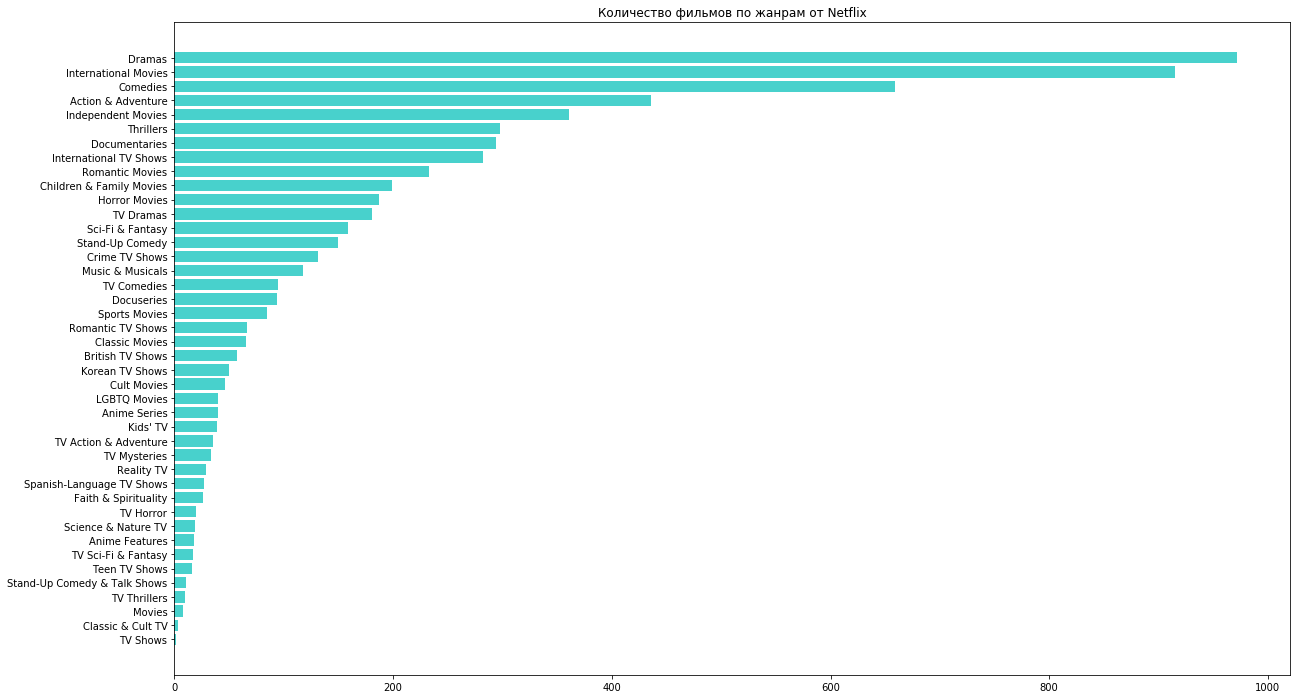

In [162]:
categories = ", ".join(df['listed_in']).split(", ")
counter_list = collections.Counter(categories).most_common()
labels1 = [i[0] for i in counter_list][::-1]
values1 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(labels1, values1, color="mediumturquoise")
ax.set_title('Количество фильмов по жанрам от Netflix')

plt.show()

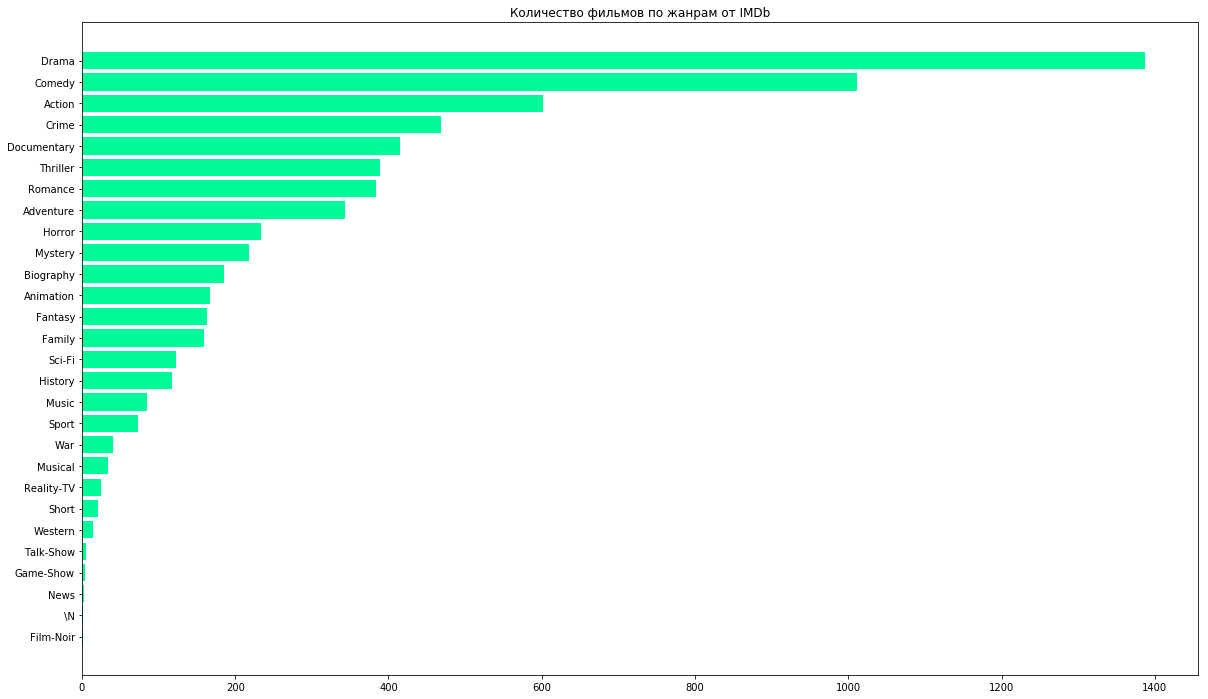

In [163]:
categories = ",".join(df['genres']).split(",")
counter_list = collections.Counter(categories).most_common()
labels2 = [i[0] for i in counter_list][::-1]
values2 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(labels2, values2, color="mediumspringgreen")
ax.set_title('Количество фильмов по жанрам от IMDb')

plt.show()

In [138]:
len(labels1), len(labels2)

(42, 28)

In [167]:
# Поскольку у Нетфликса гораздо больше жанров, а в топах те же, что и у IMDb, удалим столбец жанров IMDb
del df['genres']

In [177]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes
601,80201825,Movie,gour hari dastaan: the freedom file,Ananth Narayan Mahadevan,"Vinay Pathak, Konkona Sen Sharma, Ranvir Shore...",India,"October 15, 2017",TV-14,109 min,"Dramas, Independent Movies, International Movies",A former freedom fighter is forced to navigate...,7.5,501.0,movie,0.0,2015,\N,114
4475,80128715,Movie,rodney king,Spike Lee,Roger Guenveur Smith,United States,"April 28, 2017",TV-MA,53 min,Dramas,Roger Guenveur Smith gives voice to the man at...,5.7,500.0,tvSpecial,0.0,2017,\N,52


In [174]:
df.type.unique(), df.titleType.unique()

(array(['Movie', 'TV Show'], dtype=object),
 array(['movie', 'tvSeries', 'tvMiniSeries', 'tvMovie', 'video',
        'tvSpecial', 'tvShort', 'tvEpisode', 'short', 'videoGame'],
       dtype=object))

In [178]:
# Поскольку у Нетфликса есть деление только на кино и сериалы, а у IMDb деление подробнее, уберём Нетфликс
del df['type']

In [179]:
df.head(2)

,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes
2982,70131314,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",8.8,2006939.0,movie,0.0,2010,\N,148
3109,880640,pulp fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,8.9,1782352.0,movie,0.0,1994,\N,154


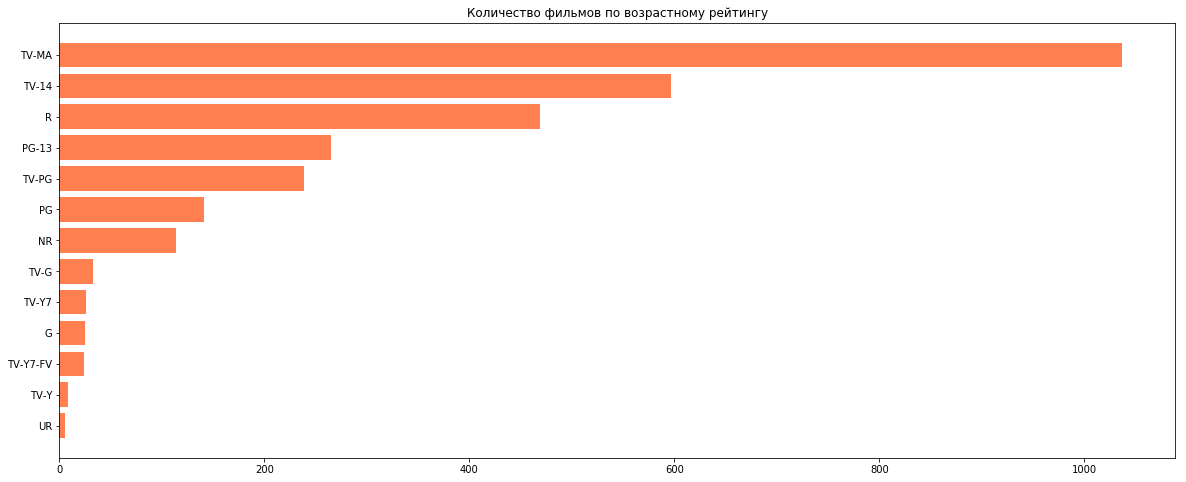

In [188]:
# Посмотрим возрастные рейтинги
categories = list(df['rating'])
counter_list = collections.Counter(categories).most_common()
labels3 = [i[0] for i in counter_list][::-1]
values3 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 8))
ax.barh(labels3, values3, color="coral")
ax.set_title('Количество фильмов по возрастному рейтингу')

plt.show()

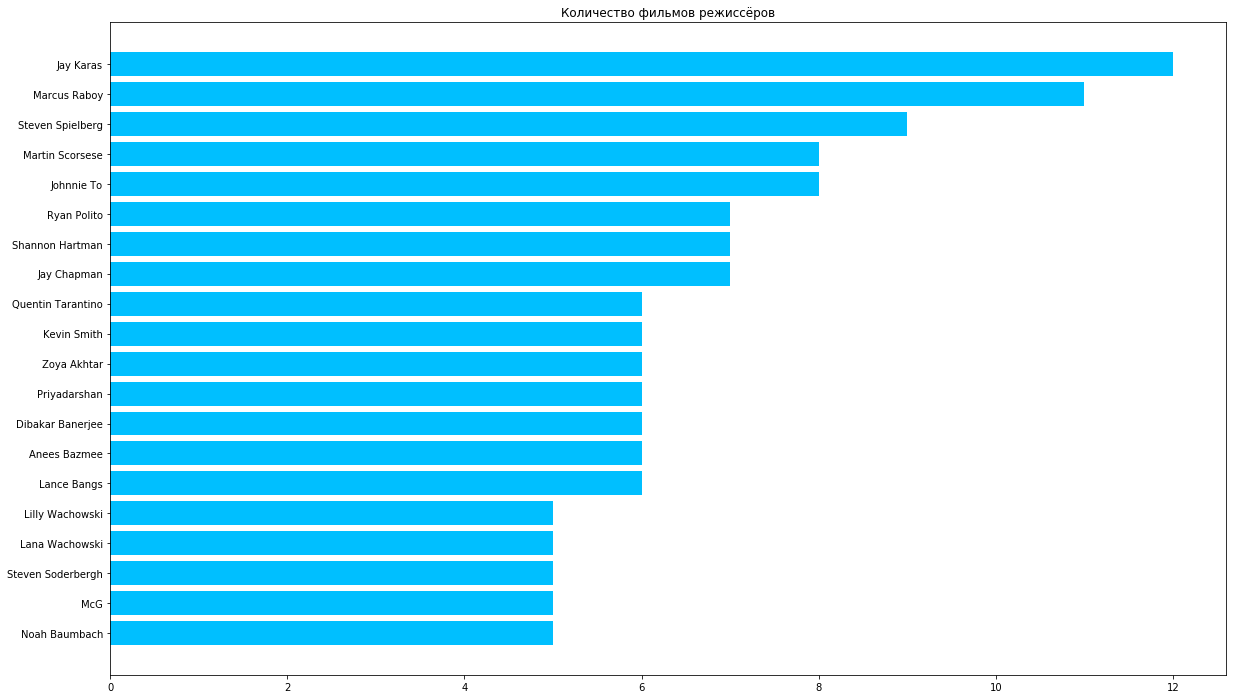

In [205]:
# Из диаграммы видно, что превалирует категория фильмов/сериалов, не предназначенных для лиц младше 17 лет,
# почти вдвое меньше не предназначенных для лиц младше 14 лет, далее рейтинг R, разрешающий просмотр лицам младше 17 лет
# только в сопровождении одного из родителей. Меньше всего фильмов без рейтинга и разрешённых для людей любого возраста.
# Посмотрим на самых популярных режиссёров.
categories = ", ".join(df[df['director'] != 'unknown']['director']).split(", ")
counter_list = collections.Counter(categories).most_common(20)
labels4 = [i[0] for i in counter_list][::-1]
values4 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(labels4, values4, color="deepskyblue")
ax.set_title('Количество фильмов режиссёров')

plt.show()

In [206]:
# Посмотрим, в каком жанре снимают режиссёры с наибольшим количеством фильмов
idx = df.director.str.contains('Jay Karas')
df.loc[idx]

,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes
3571,80004478,bill burr: i'm sorry you feel that way,Jay Karas,Bill Burr,United States,"December 5, 2014",NR,81 min,Stand-Up Comedy,"Bill Burr escapes the zombie apocalypse, explo...",8.4,6602.0,tvSpecial,0.0,2014,\N,80
2714,80133549,bill burr: walk your way out,Jay Karas,Bill Burr,United States,"January 31, 2017",TV-MA,78 min,Stand-Up Comedy,No-nonsense comic Bill Burr takes the stage in...,7.3,5851.0,tvSpecial,0.0,2017,\N,77
1382,80101493,ali wong: baby cobra,Jay Karas,Ali Wong,United States,"May 6, 2016",TV-MA,60 min,Stand-Up Comedy,Ali Wong's stand up special delves into her se...,7.5,5557.0,tvSpecial,0.0,2016,\N,60
1549,80186940,ali wong: hard knock wife,Jay Karas,Ali Wong,United States,"May 13, 2018",TV-MA,64 min,Stand-Up Comedy,"Two years after the hit ""Baby Cobra,"" Ali Wong...",7.4,3725.0,tvSpecial,0.0,2018,\N,64
4291,70237054,jim gaffigan: mr. universe,Jay Karas,Jim Gaffigan,United States,"August 11, 2016",TV-14,77 min,Stand-Up Comedy,Funnyman Jim Gaffigan offers up his unique tak...,7.8,3128.0,video,0.0,2012,\N,78
2907,80187307,tom segura: disgraceful,Jay Karas,Tom Segura,United States,"January 12, 2018",TV-MA,71 min,Stand-Up Comedy,Tom Segura gives voice to the sordid thoughts ...,7.6,2860.0,tvSpecial,0.0,2018,\N,71
2683,80077923,tom segura: mostly stories,Jay Karas,Tom Segura,United States,"January 8, 2016",TV-MA,74 min,Stand-Up Comedy,"The bearded, bawdy and comically bitter Tom Se...",7.6,2773.0,tvSpecial,0.0,2016,\N,73
4275,80044804,demetri martin: live (at the time),Jay Karas,Demetri Martin,United States,"August 14, 2015",TV-MA,62 min,Stand-Up Comedy,Demetri Martin brings his off-kilter take on a...,7.4,1867.0,tvSpecial,0.0,2015,\N,61
2437,80158802,demetri martin: the overthinker,"Jay Karas, Demetri Martin",Demetri Martin,United States,"July 21, 2019",TV-MA,56 min,Stand-Up Comedy,"With his signature one-liners and drawings, De...",7.2,1382.0,tvSpecial,0.0,2018,\N,56
2207,80993404,adam devine: best time of our lives,Jay Karas,Adam Devine,United States,"June 18, 2019",TV-MA,59 min,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,5.7,808.0,tvSpecial,0.0,2019,\N,58


In [207]:
idx = df.director.str.contains('Marcus Raboy')
df.loc[idx]

,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes
4453,80227677,anthony jeselnik: fire in the maternity ward,Marcus Raboy,Anthony Jeselnik,United States,"April 30, 2019",TV-MA,64 min,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je...",7.1,2630.0,tvSpecial,0.0,2019,\N,64
1451,80186850,steve martin and martin short: an evening you ...,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...,7.1,2126.0,tvSpecial,0.0,2018,\N,74
4512,80133552,vir das: abroad understanding,Marcus Raboy,Vir Das,United States,"April 25, 2017",TV-MA,66 min,Stand-Up Comedy,"Comedian Vir Das tackles nationalism, globalis...",6.8,1477.0,tvSpecial,0.0,2017,\N,65
901,80117461,"dana carvey: straight white male, 60",Marcus Raboy,Dana Carvey,United States,"November 4, 2016",TV-MA,64 min,Stand-Up Comedy,Emmy-winning comedian Dana Carvey blends pitch...,6.4,1338.0,tvSpecial,0.0,2016,\N,64
2364,80213715,whitney cummings: can i touch it?,Marcus Raboy,Whitney Cummings,unknown,"July 30, 2019",TV-MA,59 min,Stand-Up Comedy,"In her fourth stand-up special, Whitney Cummin...",6.4,1307.0,tvSpecial,0.0,2019,\N,59
3276,80134779,marlon wayans: woke-ish,Marcus Raboy,Marlon Wayans,United States,"February 27, 2018",TV-MA,67 min,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W...",6.5,1227.0,tvSpecial,0.0,2018,\N,68
3953,80158871,judd apatow: the return,Marcus Raboy,Judd Apatow,United States,"December 12, 2017",TV-MA,70 min,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...,6.2,1182.0,tvSpecial,0.0,2017,\N,69
3962,80995991,vir das: losing it,Marcus Raboy,Vir Das,unknown,"December 11, 2018",TV-MA,68 min,Stand-Up Comedy,"The world's got a lot of problems, but Vir Das...",7.1,1005.0,tvSpecial,0.0,2018,\N,67
4124,80184834,ryan hamilton: happy face,Marcus Raboy,Ryan Hamilton,United States,"August 29, 2017",TV-14,57 min,Stand-Up Comedy,Small-town import Ryan Hamilton charms New Yor...,7.3,763.0,tvSpecial,0.0,2017,\N,56
2779,80117453,cristela alonzo: lower classy,Marcus Raboy,Cristela Alonzo,United States,"January 24, 2017",TV-MA,67 min,Stand-Up Comedy,The irrepressible Alonzo skewers Latino stereo...,6.3,752.0,tvSpecial,0.0,2017,\N,66


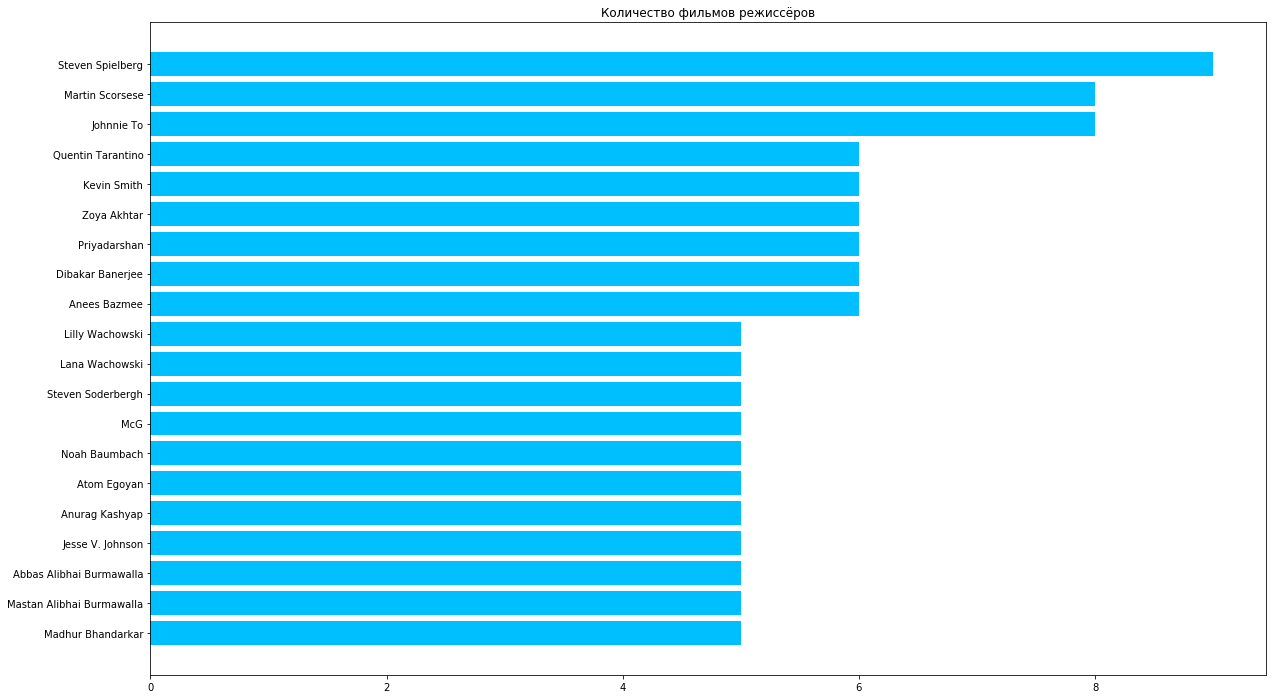

In [208]:
# Стендап-комедия - это хорошо, но не всем по вкусу. Что будет, если её исключить?
categories = ", ".join(df[(df['director'] != 'unknown') & (df['listed_in'] != 'Stand-Up Comedy')]['director']).split(", ")
counter_list = collections.Counter(categories).most_common(20)
labels4 = [i[0] for i in counter_list][::-1]
values4 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(labels4, values4, color="deepskyblue")
ax.set_title('Количество фильмов режиссёров')

plt.show()

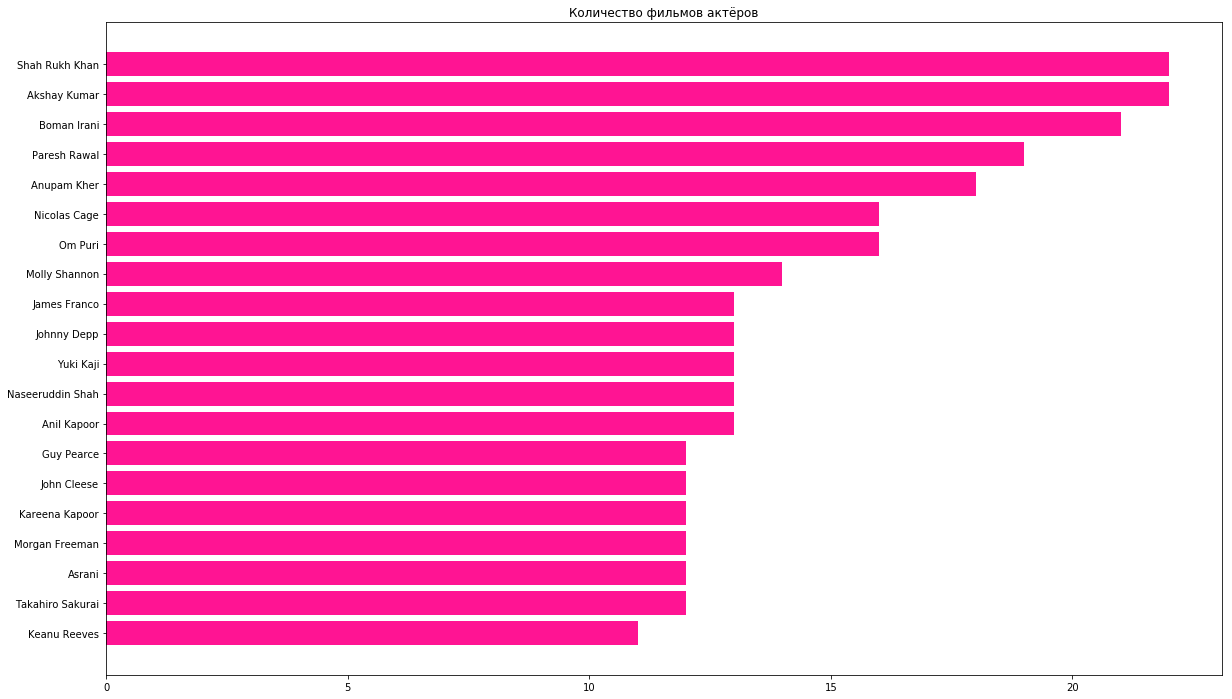

In [210]:
# Остались всемирно известные режиссёры и, судя по фамилиям, много индийских и азиатских.
# Посмотрим на самых популярных актёров
categories = ", ".join(df[df['cast'] != 'unknown']['cast']).split(", ")
counter_list = collections.Counter(categories).most_common(20)
labels5 = [i[0] for i in counter_list][::-1]
values5 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(labels5, values5, color="deeppink")
ax.set_title('Количество фильмов актёров')

plt.show()

In [237]:
# Видно очень много непривычных имён вперемежку опять же с всемирно известными. Оставим на свой вкус Америку и Европу
countries = ", ".join(df[df['country'] != 'unknown']['country']).split(", ")
countries_un = list(set(countries))
print(countries_un)
interest_countries = ['United Kingdom,', 'Spain', 'Italy', 'United States', 'France', 'United Kingdom', 'Germany']

['Singapore', 'Indonesia', 'Russia', 'Austria', 'Malaysia', 'Iran', 'Panama', 'Ireland', 'Bermuda', 'Nigeria', 'Switzerland', 'Turkey', 'Vietnam', 'Bangladesh', 'Afghanistan', 'Jordan', 'Portugal', 'Iraq', 'Albania', 'Namibia', 'United Kingdom,', 'Iceland', 'Senegal', 'Japan', 'Ukraine', 'Serbia', 'Montenegro', 'Cambodia', 'Slovenia', 'United Arab Emirates', 'Lebanon', 'Liechtenstein', 'Philippines', 'Malawi', 'Ghana', 'Paraguay', 'Uruguay', 'Nepal', 'Spain', 'Colombia', 'Italy', 'Egypt', 'Kenya', 'Georgia', 'Latvia', 'Denmark', 'United States', 'Luxembourg', 'China', 'Sweden', 'Bulgaria', 'France', 'Belgium', 'Qatar', 'Cuba', 'South Africa', 'Vatican City', 'Mexico', 'South Korea', 'Brazil', 'Argentina', 'Malta', 'Chile', 'Thailand', 'Nicaragua', 'Zimbabwe', 'Hong Kong', 'Australia', 'United Kingdom', 'Samoa', 'Sudan', 'Netherlands', 'Morocco', 'Taiwan', 'Germany', 'Norway', 'New Zealand', 'Saudi Arabia', 'Israel', 'India', 'Finland', 'West Germany', 'Greece', 'Poland', 'Somalia', 'Ca

In [238]:
idx = df.country.str.contains(interest_countries[0])
df_countries = df.loc[idx]
for i in interest_countries[1:]:
    idx = df.country.str.contains(i)
    df_i = df.loc[idx]
    df_countries = pd.concat([df_countries, df_i])
df_countries.tail()

,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes
4524,80061161,catching the sun,Shalini Kantayya,unknown,"China, Germany, India, United States","April 22, 2016",TV-14,74 min,Documentaries,This documentary explores the worldwide econom...,6.7,548.0,movie,0.0,2015,\N,75
3172,80097375,the land of the enlightened,Pieter-Jan De Pue,Sohrab Nazari,"Belgium, Ireland, Netherlands, Germany, Afghan...","January 1, 2017",TV-MA,84 min,"Documentaries, International Movies","In the rugged mountains of Afghanistan, armed ...",7.1,547.0,movie,0.0,2016,\N,87
630,80148070,blessed benefit,Mahmoud al Massad,"Ahmad Thaher, Maher Khammash, Odai Hijazi, Nad...","Germany, Jordan, Netherlands","October 13, 2017",TV-14,83 min,"Comedies, Dramas, International Movies","After being wrongfully convicted of fraud, an ...",6.7,522.0,movie,0.0,2016,\N,83
1170,80208213,age of tanks,unknown,unknown,"Germany, France, Russia","November 10, 2018",TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",The history of military tanks unfolds in a doc...,7.3,520.0,tvMiniSeries,0.0,2017,2017,54
694,81168340,medium,Jacek Koprowicz,"Władysław Kowalski, Michał Bajor, Jerzy Zelnik...","Poland, West Germany","October 1, 2019",TV-MA,90 min,"Horror Movies, International Movies, Thrillers","In 1930s Poland, a powerful psychic steers a g...",6.5,515.0,movie,0.0,1985,\N,98


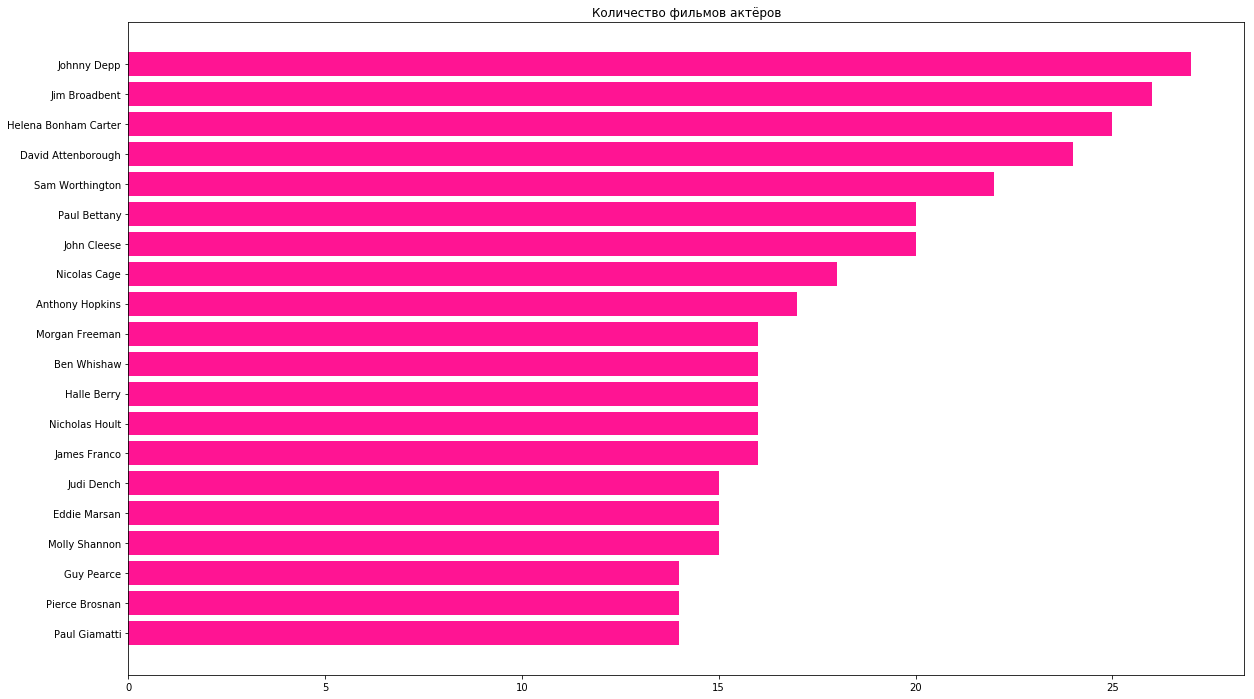

In [239]:
# Видно, что, как правило, европейские страны снимают совместно с другими, а не в одиночку.
# Снова посмотрим на популярных актёров
categories = ", ".join(df_countries[df_countries['cast'] != 'unknown']['cast']).split(", ")
counter_list = collections.Counter(categories).most_common(20)
labels5 = [i[0] for i in counter_list][::-1]
values5 = [i[1] for i in counter_list][::-1]

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(labels5, values5, color="deeppink")
ax.set_title('Количество фильмов актёров')

plt.show()

In [240]:
# Всего четыре женщины в топ-20. Ну ладно. Тогда посмотрим, какие работы с участием Найвы Нимри представлены на Нетфликсе
idx = df.cast.str.contains('Najwa')
df.loc[idx]

,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes
3254,80109296,quién te cantará,Carlos Vermut,"Najwa Nimri, Eva Llorach, Carme Elias, Natalia...","Spain, France","February 28, 2019",TV-MA,125 min,"Dramas, Independent Movies, International Movies",When a near-drowning leaves a famous singer fr...,7.0,2286.0,movie,0.0,2018,\N,125
3212,81029383,the tree of blood,Julio Medem,"Úrsula Corberó, Álvaro Cervantes, Najwa Nimri,...",Spain,"February 8, 2019",TV-MA,136 min,"Dramas, Independent Movies, International Movies",As a young couple write the story of their fam...,6.4,2207.0,movie,0.0,2018,\N,130


In [244]:
# Непорядок! А как же "Визави" и "Бумажный дом"? Потерялись при объединении датасетов? Посмотрим в исходном от Нетфликса
idx = dfn.cast.str.contains('Najwa')
dfn.loc[idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3756,81029383,Movie,the tree of blood,Julio Medem,"Úrsula Corberó, Álvaro Cervantes, Najwa Nimri,...",Spain,"February 8, 2019",2018,TV-MA,136 min,"Dramas, Independent Movies, International Movies",As a young couple write the story of their fam...
3796,80109296,Movie,quién te cantará,Carlos Vermut,"Najwa Nimri, Eva Llorach, Carme Elias, Natalia...","Spain, France","February 28, 2019",2018,TV-MA,125 min,"Dramas, Independent Movies, International Movies",When a near-drowning leaves a famous singer fr...
5604,80059465,TV Show,locked up,unknown,"Maggie Civantos, Najwa Nimri, Carlos Hipólito,...",Spain,"September 25, 2019",2019,TV-MA,4 Seasons,"Crime TV Shows, International TV Shows, Spanis...",Manipulated into embezzling funds for her boyf...


In [265]:
# "Визави" на месте, записан под названием "Locked Up", с которым был отправлен в международный прокат.
# Но раз его нет в итоговом датасете, то поищем под оригинальным названием в IMDb
idx = df3['originalTitle'].str.contains('vis a vis')
df3.loc[idx]

,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
210577,7.4,14.0,tvMovie,vis a vis: native tongues,vis a vis: native tongues,0.0,2003,\N,57,Biography
449727,7.0,1668.0,tvSeries,vis a vis: el oasis,vis a vis: el oasis,0.0,2020,2020,\N,Thriller
842767,8.2,14397.0,tvSeries,vis a vis,vis a vis,0.0,2015,2019,53,"Drama,Thriller"
897427,8.6,5.0,short,vis a vis,vis a vis,0.0,2014,\N,8,"Fantasy,Short"


In [262]:
# Все на месте: и основной, и спи-офф "Оазис", однако почему-то "международное" название совпадает с оригинальным испанским.
# Поищем на Нетфликсе "Бумажный дом" с "международным" названием
idx = dfn['title'].str.contains('money heist')
dfn.loc[idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [263]:
# И с оригинальным
idx = dfn['title'].str.contains('la casa de papel')
dfn.loc[idx]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5954,80192098,TV Show,la casa de papel,unknown,"Úrsula Corberó, Itziar Ituño, Álvaro Morte, Pa...",Spain,"July 19, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, International TV Shows, Spanis...",Eight thieves take hostages and lock themselve...


In [261]:
# Выходит, оба искомых сериала в базе Нетфликса есть. Заглянем в список актёров "Бумажного дома" и узнаем, почему там нет Найвы
list(dfn.loc[idx]['cast'])

['Úrsula Corberó, Itziar Ituño, Álvaro Morte, Paco Tous, Enrique Arce, Pedro Alonso, María Pedraza, Alba Flores, Miguel Herrán, Jaime Lorente, Esther Acebo, Darko Peric, Kiti Mánver']

In [264]:
# А нет её потому, что она присоединилась к касту только с третьего сезона, тогда как в списке актёры с ролями первого плана
# в первых двух сезонах.
# Проверим, почему сериала нет в объединённом датасете
idx = df3['primaryTitle'].str.contains('money heist')
df3.loc[idx]

,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
516682,7.5,1871.0,tvMovie,money heist: the phenomenon,la casa de papel: el fenómeno,0.0,2020,\N,57,Documentary
948313,8.4,269278.0,tvSeries,money heist,la casa de papel,0.0,2017,\N,70,"Action,Crime,Mystery"


In [266]:
# Его там нет потому, что на этот раз на IMDb всё верно: оригинальное название отличается от прокатного, и именно поэтому
# не получилось соединить title в dfn и primaryTitle в df3. Такая ситуация лишь с двумя испанскими сериалами даёт повод
# предположить, что данных о неанглоязычных фильмах, к сожалению, потерялось гораздо больше